# FeatureEngineering dataset3, Naive Bayes classifier,RandomForestClassifier-LogisticRegression.

The following notebook has focused on feature engineering based on, ”DayOfWeek”, “PdDistrict”, ”hour”, "DayOfYear", “year”,"X_Y" variables and after extracnign dummy variables it has 1556 Colum. 

In [1]:
%load_ext watermark
%watermark -a 'Sohrab' -u -d -v -p numpy,pandas,matplotlib
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import tree
from sklearn import cross_validation,preprocessing

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Sohrab 
last updated: 2016-09-07 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1


In [2]:
#Load Data with pandas, and parse the first column into datetime
train=pd.read_csv('../../Dataset/train-2.csv', parse_dates = ['Dates'])
train['DayOfYear'] = train['Dates'].map(lambda x: x.strftime("%m-%d"))
train['hour'] = train.Dates.dt.hour
train['year'] = train.Dates.dt.year

train['X'] = train['X'].round(2)
train['Y'] = train['Y'].round(3)

def latlong(geo):
    latitude,longitude = geo
    return latitude,longitude
train['X_Y']= train[['X','Y']].apply(latlong, axis=1)

In [3]:
cate_variables = ['DayOfWeek','PdDistrict','hour','year','X_Y','DayOfYear']
dfTrain = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(train[var_name], prefix=var_name) 
    train = train.drop([var_name], axis = 1)
    
    if dfTrain.empty:
        dfTrain = df
    else:
        dfTrain = dfTrain.join(df)
        
crimeCat = preprocessing.LabelEncoder()
crime = crimeCat.fit_transform(train.Category)   
dfTrain['crime']=crime
dfTrain = dfTrain.drop(['X_Y_(-122.37, 37.729999999999997)', 
                        'X_Y_(-122.37, 37.731000000000002)',
                        'X_Y_(-122.37, 37.731999999999999)',
                        'X_Y_(-122.37, 37.810000000000002)',
                         ], axis = 1)
dfTrain.head()

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,DayOfYear_12-23,DayOfYear_12-24,DayOfYear_12-25,DayOfYear_12-26,DayOfYear_12-27,DayOfYear_12-28,DayOfYear_12-29,DayOfYear_12-30,DayOfYear_12-31,crime
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16


alpha:  10 LogLoss:  2.6661066312
alpha:  30 LogLoss:  3.11982839779
alpha:  50 LogLoss:  3.57107604508
alpha:  70 LogLoss:  3.96454994911
alpha:  90 LogLoss:  4.35544732454
alpha:  110 LogLoss:  4.73363448301
alpha:  130 LogLoss:  5.04085829536
alpha:  150 LogLoss:  5.36143098597
alpha:  170 LogLoss:  5.69421992785
alpha:  190 LogLoss:  6.02525571306
alpha:  210 LogLoss:  6.33007350952
alpha:  230 LogLoss:  6.61175521364
alpha:  250 LogLoss:  6.88660987864
alpha:  270 LogLoss:  7.14884665751
alpha:  290 LogLoss:  7.38755154254
alpha:  310 LogLoss:  7.61967257123
alpha:  330 LogLoss:  7.85481255639
alpha:  350 LogLoss:  8.0926929196
alpha:  370 LogLoss:  8.33296860409
alpha:  390 LogLoss:  8.57534782826
alpha:  410 LogLoss:  8.81958169844
alpha:  430 LogLoss:  9.0653555103
alpha:  450 LogLoss:  9.30737497341
alpha:  470 LogLoss:  9.53573486535
alpha:  490 LogLoss:  9.75814860789
alpha:  510 LogLoss:  9.98137436594
alpha:  530 LogLoss:  10.2055632797
alpha:  550 LogLoss:  10.4306173039


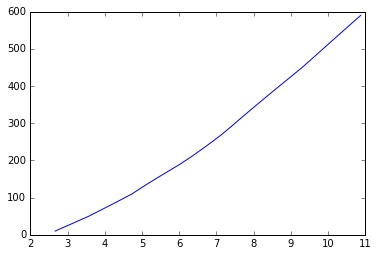

In [4]:
LLscores = []
for a in range (10, 600, 20):
    
    model = BernoulliNB(alpha = a)
    
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("alpha: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'alpha': range(10, 600, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

n_estimators:  10 LogLoss:  2.15923563817
n_estimators:  30 LogLoss:  2.1283967279
n_estimators:  50 LogLoss:  2.1183708623
n_estimators:  70 LogLoss:  2.11617089343
n_estimators:  90 LogLoss:  2.11414852369
n_estimators:  110 LogLoss:  2.11287986053
n_estimators:  130 LogLoss:  2.11156047022
n_estimators:  150 LogLoss:  2.11199736675
n_estimators:  170 LogLoss:  2.11100530047
n_estimators:  190 LogLoss:  2.11170982223
n_estimators:  210 LogLoss:  2.11060566327
n_estimators:  230 LogLoss:  2.11049758471
n_estimators:  250 LogLoss:  2.11005541496
n_estimators:  270 LogLoss:  2.11029766203
n_estimators:  290 LogLoss:  2.10966070654


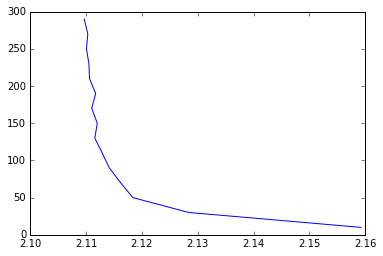

In [5]:
LLscores = []
for a in range (10, 300, 20):
    model = RandomForestClassifier(n_estimators = a , 
                                       min_samples_split = 200, 
                                       criterion = 'entropy', 
                                       n_jobs = -1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("n_estimators: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'n_estimators': range(10, 300, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

n_estimators:  10 LogLoss:  2.15751872602
n_estimators:  30 LogLoss:  2.12676269991
n_estimators:  50 LogLoss:  2.11891029823
n_estimators:  70 LogLoss:  2.11587727931
n_estimators:  90 LogLoss:  2.11422730505
n_estimators:  110 LogLoss:  2.11306892996
n_estimators:  130 LogLoss:  2.11338509513
n_estimators:  150 LogLoss:  2.1118786991
n_estimators:  170 LogLoss:  2.11136224433
n_estimators:  190 LogLoss:  2.11079892968
n_estimators:  210 LogLoss:  2.1106053275
n_estimators:  230 LogLoss:  2.10991740412
n_estimators:  250 LogLoss:  2.11015225061
n_estimators:  270 LogLoss:  2.10989118464
n_estimators:  290 LogLoss:  2.10986385389


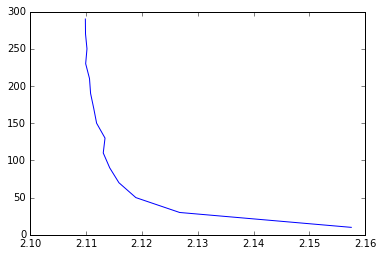

In [6]:
LLscores = []
for a in range (10, 300, 20):
    model = RandomForestClassifier(n_estimators = a , 
                                       min_samples_split = 200, 
                                       criterion = 'entropy',
                                       n_jobs = -1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("n_estimators: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'n_estimators': range(10, 300, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

min_samples_split:  10 LogLoss:  1.04252588111
min_samples_split:  30 LogLoss:  1.35823024707
min_samples_split:  50 LogLoss:  1.49952685866
min_samples_split:  70 LogLoss:  1.59867839528
min_samples_split:  90 LogLoss:  1.6760988653
min_samples_split:  110 LogLoss:  1.73685344818
min_samples_split:  130 LogLoss:  1.78672086828
min_samples_split:  150 LogLoss:  1.8295083375
min_samples_split:  170 LogLoss:  1.8655950826
min_samples_split:  190 LogLoss:  1.89612121077
min_samples_split:  210 LogLoss:  1.92430653586
min_samples_split:  230 LogLoss:  1.9487086413
min_samples_split:  250 LogLoss:  1.96777791883
min_samples_split:  270 LogLoss:  1.98691242464
min_samples_split:  290 LogLoss:  2.00476706425
min_samples_split:  310 LogLoss:  2.0213537999
min_samples_split:  330 LogLoss:  2.03689038212
min_samples_split:  350 LogLoss:  2.05048486084
min_samples_split:  370 LogLoss:  2.06437328225
min_samples_split:  390 LogLoss:  2.07511899387
min_samples_split:  410 LogLoss:  2.08843239569
mi

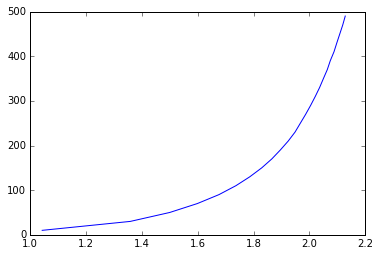

In [7]:
LLscores = []
for a in range (10, 500, 20):
    model = RandomForestClassifier(n_estimators = 200 , 
                                       min_samples_split = a,  
                                       n_jobs = -1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("min_samples_split: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'min_samples_split': range(10, 500, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)


# Making a prediction on the test data set

Initially we need to convert the test dataset to dummy variables similar to what we did to make “dfTrain”.



In [13]:
test=pd.read_csv('../../Dataset/test-2.csv', parse_dates = ['Dates'])
test['DayOfYear'] = test['Dates'].map(lambda x: x.strftime("%m-%d"))
test['hour'] = test.Dates.dt.hour
test['year'] = test.Dates.dt.year

test['X'] = test['X'].round(2)
test['Y'] = test['Y'].round(3)

def latlong(geo):
    latitude,longitude = geo
    return latitude,longitude
test['X_Y']= test[['X','Y']].apply(latlong, axis=1)

cate_variables = ['DayOfWeek','PdDistrict','hour','year','DayOfYear', 'X_Y']

dfTest = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(test[var_name], prefix=var_name) 
    test = test.drop([var_name], axis = 1)
    
    if dfTest.empty:
        dfTest = df
    else:
        dfTest = dfTest.join(df)
        
dfTest = dfTest.drop(['DayOfYear_01-03', 'DayOfYear_01-04'], axis = 1)
dfTest.head()

,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,...,"X_Y_(-122.37, 37.729999999999997)","X_Y_(-122.37, 37.731000000000002)","X_Y_(-122.37, 37.731999999999999)","X_Y_(-122.37, 37.810000000000002)","X_Y_(-122.37, 37.814999999999998)","X_Y_(-122.37, 37.817)","X_Y_(-122.37, 37.82)","X_Y_(-122.36, 37.810000000000002)","X_Y_(-122.36, 37.820999999999998)","X_Y_(-120.5, 90.0)"
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## RandomForestClassifier
For this model with bot X-Y and days of year we have 2.1968014 on train data set and  and 2.55079 on sumited result log_loss.  


In [14]:
model = RandomForestClassifier(n_estimators = 230 , 
                               min_samples_split = 300, 
                               criterion = 'entropy', 
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.1972361211523928

In [15]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_DS3.csv', index = True, index_label = 'Id' )